In [1]:
import bhnerf
from astropy import units
import jax

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from flax.training import checkpoints
from pathlib import Path
import ruamel.yaml as yaml
import warnings
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '6,7'
warnings.simplefilter("ignore")

Welcome to eht-imaging! v 1.2.5 



Visualize synthetic recoveries
---
This notebook visualizes the 3D recovery and inclination $\chi^2$ for synthetic data recoveries and analysis

In [2]:
basename = 'inc_{:.1f}.seed_{}'
recovery_path = Path('../data/synthetic_lightcurves/flux_tube/recovery/sim2_seed1_Q_0.25_intrinsic/')
with open(recovery_path.joinpath('params.yaml'), 'r') as stream:
    config = yaml.load(stream, Loader=yaml.Loader)

locals().update(config['simulation']['model'])
locals().update(config['recovery']['model'])
locals().update(config['recovery']['optimization']) 

# Read and split data 
data_path = Path(config['simulation']['lightcurve_path'])
lightcurves_df = pd.read_csv(data_path)
target, t_frames = np.array(lightcurves_df[stokes]), np.array(lightcurves_df['t'])*units.hr
train_idx = t_frames <= t_start_obs*units.hr + train_split*units.min
t_train, data_train  = t_frames[train_idx], target[train_idx]

inc_true = config['simulation']['model']['inclination']
params = config['simulation']['model'] | config['recovery']['model']

Inclination $\chi^2$
---
Compute and plot the data-fit as a function of inclination angle: $\chi^2\left(\theta_o\right)$ \
This notebook only loades previously saved checkpoints and aggregates the $\chi^2$ across inclination. \
The tomographic recovery needs to be pre-run with the script: `Fit_Synthetic_LP_Flares.py`

In [ ]:
def plot_chi2(df, inc_true, xticks=range(10,90,10), figsize=(5,4), latex=True):
    if latex: 
        plt.rcParams.update({"text.usetex": True, 'font.family': 'lmodern'})
    plt.figure(figsize=figsize)
    plt.errorbar(df.index, np.nanmean(np.log10(df), axis=1), np.nanstd(np.log10(df), axis=1), color='tab:orange', marker='^', mfc='r', mec='r', label='data', markersize=5)
    plt.title(r'Inclination data-fit: $\log \chi^2(\theta | {\bf w}^\star)$', fontsize=16)
    plt.xticks(fontsize='14')
    plt.yticks(fontsize='14')
    plt.axhline(0, color='black', linestyle='--',linewidth=0.75)
    plt.axvline(inc_true, color='black', linestyle='--',linewidth=1.3)
    plt.text(inc_true*1.01, 8.5, r'$\theta_{\rm true}$', fontsize=16)
    plt.legend()
    plt.xticks(xticks);

### Plot pre-computed $\chi^2(\theta_o)$

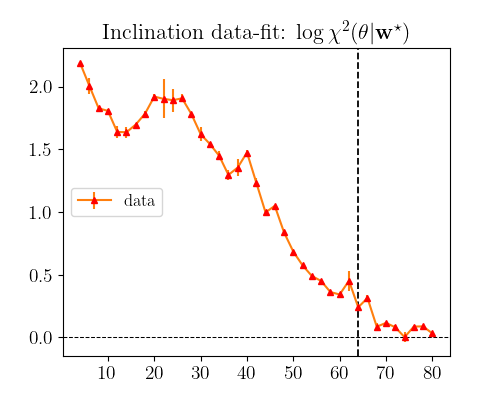

In [8]:
chi2_inc = pd.read_csv(recovery_path.joinpath('inclination_loss_subrays_10.csv'), index_col=0)
%matplotlib widget
plot_chi2(chi2_inc, inc_true)
plt.savefig(recovery_path.joinpath('inclination_loss_log_subrays_{}.pdf'.format(num_subrays)))

### Compute $\chi^2(\theta_o)$

inc:   0%|          | 0/39 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

seed:   0%|          | 0/4 [00:00<?, ?it/s]

subrays:   0%|          | 0/10 [00:00<?, ?it/s]

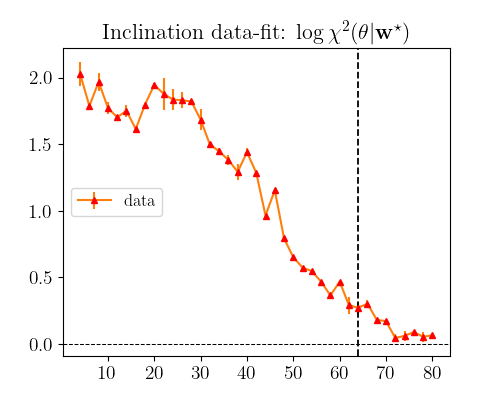

In [5]:
"""
Compute a chi2 over a set of random subpixel rays. 
This enables better generalization across different model parameters.
"""
num_subrays = 10
seeds = range(4)
inclinations = np.arange(4, 82, 2, dtype=float)

checkpoint_fmt = str(recovery_path.joinpath('inc_{:.1f}.seed_{}'))
chi2_inc = bhnerf.alma.chi2_df(
    inclinations, spin, seeds, params, checkpoint_fmt, t_train, data_train, stokes, sigma, num_subpixel_rays=num_subrays
)
chi2_inc.to_csv(recovery_path.joinpath('inclination_loss_subrays_{}.csv'.format(num_subrays)))

%matplotlib widget
plot_chi2(chi2_inc, inc_true)

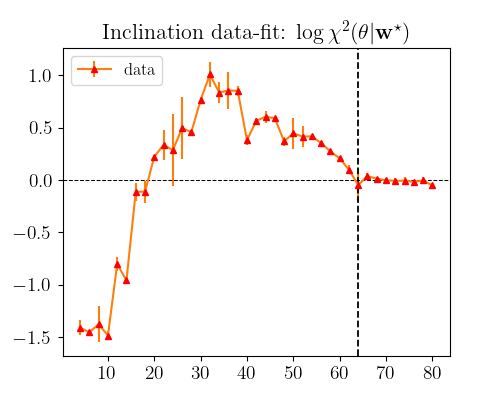

In [7]:
"""
Compute a chi2 over a fixed set of rays. 
This results in overfitting at low inclination angles.
"""
seeds = range(4)
inclinations = np.arange(4, 82, 2, dtype=float)

checkpoint_fmt = str(recovery_path.joinpath('inc_{:.1f}.seed_{}'))
chi2_inc = bhnerf.alma.chi2_df(inclinations, spin, seeds, params, checkpoint_fmt, t_train, data_train, stokes, sigma)
chi2_inc.to_csv(recovery_path.joinpath('inclination_loss.csv'))

%matplotlib widget
plot_chi2(chi2_inc, inc_true)

## 3D volume
---
Visualize a single 3D recovery for fixed black-hole parameters

In [4]:
# Ground truth volumetric emission
flare_path = Path(config['simulation']['flare_path'])
emission_flare = emission_flare = emission_scale * xr.load_dataarray(flare_path)
bhnerf.visualization.ipyvolume_3d(emission_flare, fov=fov_M, level=[0.1, .2, 0.6], elevation=0)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [5]:
seed = 1
inclination = 60
resolution = 64
checkpoint_dir = recovery_path.joinpath(basename.format(inclination, seed))

emission = bhnerf.network.sample_checkpoint_3d(checkpoint_dir, fov=fov_M, resolution=resolution)
bhnerf.visualization.ipyvolume_3d(emission, fov=fov_M, level=[0.1, .2, 0.6], elevation=0)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### Custom renderer, for consistent plotting
Takes more time to render 3D volumes.

In [13]:
seed = 1
inclination = 60
checkpoint_dir = recovery_path.joinpath(basename.format(inclination, seed))

jit = False
resolution = 256
bh_radius = 1 + np.sqrt(1-spin**2)
cam_r = 55.
linewidth = 0.14
zenith = np.deg2rad(35)

visualizer = bhnerf.visualization.VolumeVisualizer(resolution, resolution, resolution)
visualizer.set_view(cam_r=cam_r, domain_r=rmax, azimuth=0.0, zenith=zenith)

emission_flare = emission_scale * xr.load_dataarray(config['simulation']['flare_path'])
emission_true = emission_flare.interp(x=xr.DataArray(visualizer.x), 
                                      y=xr.DataArray(visualizer.y), 
                                      z=xr.DataArray(visualizer.z)).fillna(0.0).data

norm_const =  emission_true.max()
emission_rec =  bhnerf.network.sample_checkpoint_3d(checkpoint_dir, coords=visualizer.coords, chunk=32)
image_true = visualizer.render(emission_true / norm_const, facewidth=1.9*rmax, jit=jit, 
                               bh_radius=bh_radius, linewidth=linewidth)
image_rec = visualizer.render(emission_rec / norm_const, facewidth=1.9*rmax, jit=jit, 
                              bh_radius=bh_radius, linewidth=linewidth)

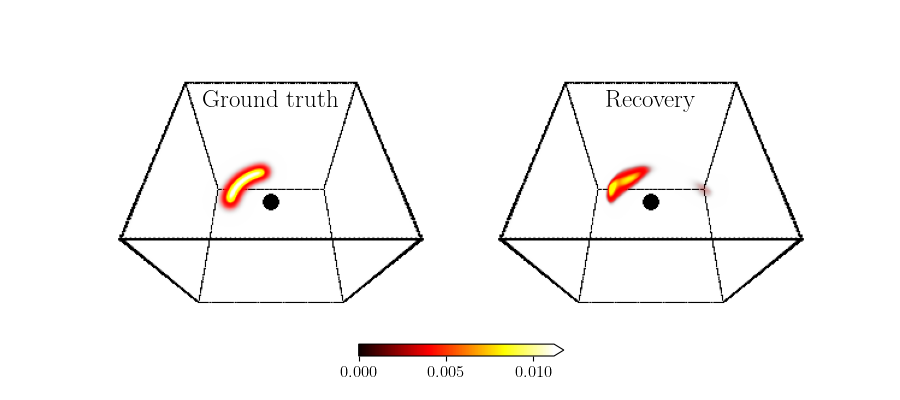

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

%matplotlib widget
images = [image_true, image_rec]
titles = ['Ground truth', 'Recovery']
fig, axes = plt.subplots(1,2, figsize=(9,4))
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=18, y=0.78)
    ax.set_axis_off()
    
ax = fig.add_subplot(132)
ax.set_visible(False)
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='3%', pad=-1)
cmap = plt.cm.ScalarMappable(norm=Normalize(0, norm_const, clip=True), cmap=plt.get_cmap('hot'))
cbar = fig.colorbar(cmap, cax=cax, orientation='horizontal', shrink=.0, extend='max')
cbar.ax.tick_params(labelsize=12) 
plt.tight_layout()
plt.savefig(checkpoint_dir.joinpath('gt_vs_rec.pdf'.format(inclination, seed)), bbox_inches='tight')

## Light curve fit
---
plot the model fit to synthetic data

In [3]:
def plot_datafit(data, model, titles=[r'$I_U$ datafit', r'$Q-U$ datafit'], latex=True):
    if latex: 
        plt.rcParams.update({"text.usetex": True, 'font.family': 'lmodern'})
    axes = bhnerf.visualization.plot_stokes_lc(data_train, stokes, t_train, label='Data')
    bhnerf.visualization.plot_stokes_lc(model, stokes, t_train, axes=axes, color='r', fmt='x', label='Model')
    
    for ax, title in zip(axes, titles):
        ax.set_title(title, fontsize=16)
        ax.legend()
    axes[0].set_xlabel('Time [UT]', fontsize=12)
    axes[1].set_xlabel('Time [UT]', fontsize=12)
    plt.tight_layout()

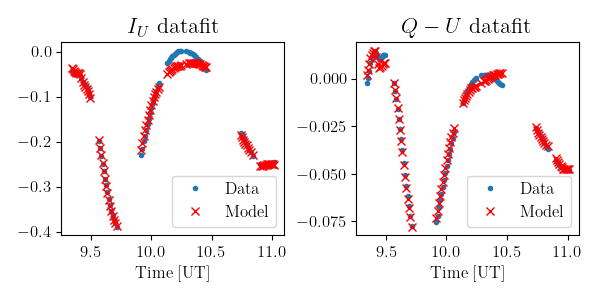

In [8]:
seed = 1
inclination = 60
batchsize = 20
checkpoint_dir = recovery_path.joinpath(basename.format(inclination, seed))

raytracing_args = bhnerf.alma.get_raytracing_args(np.deg2rad(inclination), spin, params, stokes)
image_plane = bhnerf.network.image_plane_checkpoint(raytracing_args, checkpoint_dir, t_train, batchsize=batchsize)
model = image_plane.sum(axis=(-1,-2))

%matplotlib widget
plot_datafit(data_train, model)
# plt.savefig(checkpoint_dir.joinpath('{}.datafit.pdf'.format(stokes)), bbox_inches='tight')